In [ ]:
from google.colab import files
uploaded = files.upload()

Saving appliance_energy.csv to appliance_energy.csv


In [ ]:
import pandas as pd
df = pd.read_csv('appliance_energy.csv')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df=pd.read_csv('appliance_energy.csv')
print(df.head())

   Temperature (°C)  Energy Consumption (kWh)
0         22.490802                  2.292604
1         34.014286                  3.251925
2         29.639879                  3.009868
3         26.973170                  1.703533
4         18.120373                  1.702201


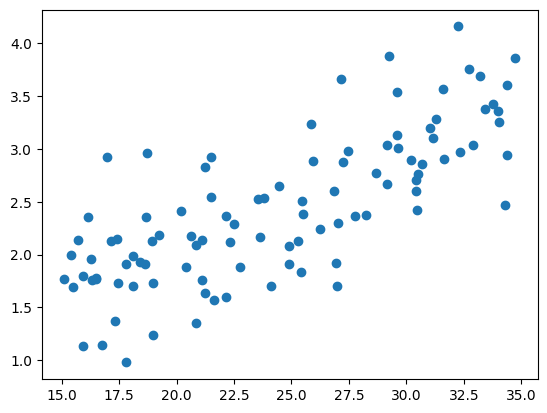

In [ ]:
import seaborn as sns
plt.scatter(df['Temperature (°C)'],df['Energy Consumption (kWh)'])
plt.show()

In [ ]:
df.describe()

,Temperature (°C),Energy Consumption (kWh)
count,100.000000,100.000000
mean,24.403615,2.439821
std,5.949788,0.693527
min,15.110442,0.978107
25%,18.864015,1.908640
50%,24.282849,2.364121
75%,29.604062,2.931199
max,34.737739,4.159094


In [ ]:
#check for missing values
print(df.isnull().sum())
#df=df.dropna()

Temperature (°C)            0
Energy Consumption (kWh)    0
dtype: int64


In [ ]:
#Features (independent variable) and target (deoendent variable)
#independent variable (Temperature)
X=df['Temperature (°C)']
#dependent variable (Energy Consumption)
Y=df['Energy Consumption (kWh)']

In [ ]:
#Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
#create a linear regression model
model = LinearRegression()
#Train the model
model.fit(X_train.values.reshape(-1, 1), Y_train)

LinearRegression()

In [ ]:
print("Slope: ",model.coef_)
print("Y_intercept: ",model.intercept_)

Slope:  [0.08996618]
Y_intercept:  0.22196391661907633


In [ ]:
#y=mx+c
print(model.coef_*28.25+model.intercept_)

[2.76350858]


In [ ]:
#made predictions on test set
y_pred=model.predict(X_test.values.reshape(-1,1))

In [ ]:
y_pred


array([1.6858187 , 3.18154068, 2.96097494, 2.76354868, 2.0370856 ,
       2.36343345, 2.09711944, 3.12445907, 1.60849483, 2.24537556,
       2.34866555, 2.66462648, 3.0387357 , 3.27880886, 1.78664542,
       1.85218469, 2.95922164, 1.70468695, 3.0692904 , 1.87828475])

In [ ]:
#calculate mean squared error
mse=mean_squared_error(Y_test,y_pred)
print("Mean Squared Error: ",mse)

r2=r2_score(Y_test,y_pred)
print("R-squared: ",r2)

Mean Squared Error:  0.16342487842925055
R-squared:  0.6119478445218713


Text(0, 0.5, 'Energy Consumption (kWh)')

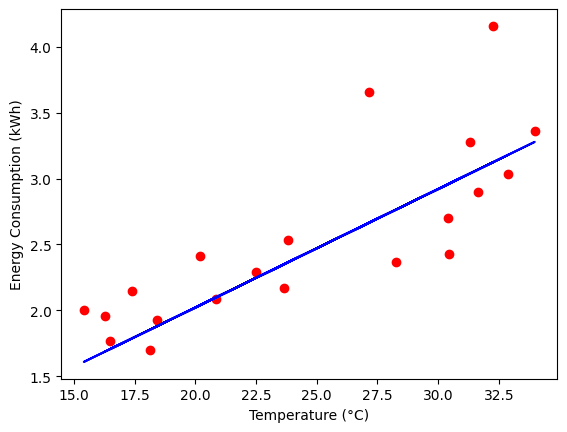

In [ ]:
#plot the test data and regression  line
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,y_pred,color='blue')
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')

In [ ]:
import joblib
#Save the model to a file
joblib.dump(model, 'energy_consumption_model.pkl')

['energy_consumption_model.pkl']

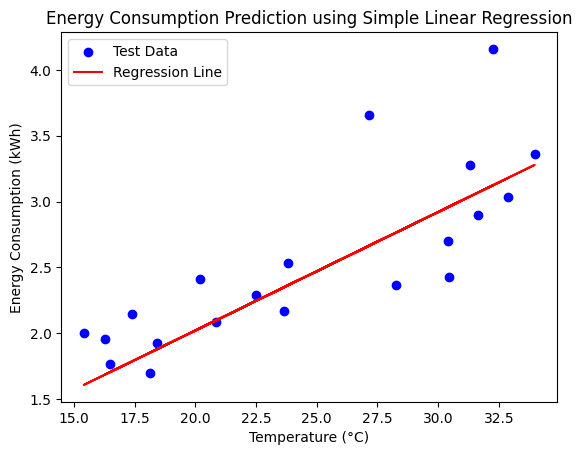

In [ ]:
# Plot the test data and regression line
plt.scatter(X_test, Y_test, color='blue', label='Test Data')  # Actual data
plt.plot(X_test, y_pred, color='red', label='Regression Line')  # Predicted data
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.title('Energy Consumption Prediction using Simple Linear Regression')
plt.show()



In [ ]:

new_data = np.array([[22.49]])
predictions = model.predict(new_data)
# Print the predictions
print(predictions)

[2.24530337]
